# Equipo 4 - Cultivos
- Nueva PCB

In [1]:
import os
import datetime
import glob

import numpy as np
import pandas as pd
import plotly.graph_objects as go

## Prueba en CENEHA

In [2]:
path = r'data/EQ4-cultivos/prueba-ceneha-1/'                     # use your path
all_files = glob.glob(os.path.join(path, "*.CSV"))     # advisable to use os.path.join as this makes
all_files = sorted(all_files, reverse=False)

dfs = (pd.read_csv(f, sep=";", parse_dates=['datetime'], names=['datetime', 'sensor', 'd1', 'd2','d3','d4','d5','d6','d7','d8','d9','d10','x'], comment='#') for f in all_files)
eq4   = pd.concat(dfs, ignore_index=True)

datetime sensor      d1     d2     d3     d4     d5     d6  \
0    2022-07-08 16:22:14      2  115.00  114.0  115.0  115.0  115.0  115.0   
1    2022-07-08 16:22:14      3  119.00  119.0  119.0  119.0  119.0  119.0   
2    2022-07-08 16:22:14      4  120.00  120.0  120.0  121.0  120.0  121.0   
3    2022-07-08 16:22:14      5  119.00  118.0  118.0  119.0  118.0  118.0   
4    2022-07-08 16:22:14     ht   80.00   18.7    NaN    NaN    NaN    NaN   
...                  ...    ...     ...    ...    ...    ...    ...    ...   
4837 2022-07-25 16:04:23      3  121.00  121.0  122.0  121.0  121.0  121.0   
4838 2022-07-25 16:04:23      4  122.00  122.0  122.0  122.0  122.0  122.0   
4839 2022-07-25 16:04:23      5  121.00  121.0  121.0  121.0  121.0  121.0   
4840 2022-07-25 16:04:23     ht   99.00   19.7    NaN    NaN    NaN    NaN   
4841 2022-07-25 16:04:23      v    3.77    NaN    NaN    NaN    NaN    NaN   

         d7     d8     d9    d10   x  
0     114.0  115.0  115.0  115.0 NaN  
1     119.0  119.0  119.0  119.0 NaN  
2     120.0  121.0  120.0  120.0 NaN  
3     119.0  119.0  118.0  118.0 NaN  
4       NaN    NaN    NaN    NaN NaN  
...     ...    ...    ...    ...  ..  
4837  121.0  121.0  121.0  122.0 NaN  
4838  122.0  122.0  122.0  122.0 NaN  
4839  121.0  121.0  121.0  121.0 NaN  
4840    NaN    NaN    NaN    NaN NaN  
4841    NaN    NaN    NaN    NaN NaN  

[4842 rows x 13 columns]

In [5]:
# Separo dataframes por cada sensor
s1 = eq4[eq4.sensor == "1"]
s2 = eq4[eq4.sensor == "2"]
s3 = eq4[eq4.sensor == "3"]
s4 = eq4[eq4.sensor == "4"]
s5 = eq4[eq4.sensor == "5"]
ht = eq4[eq4.sensor == "ht"]
v  = eq4[eq4.sensor == "v"]

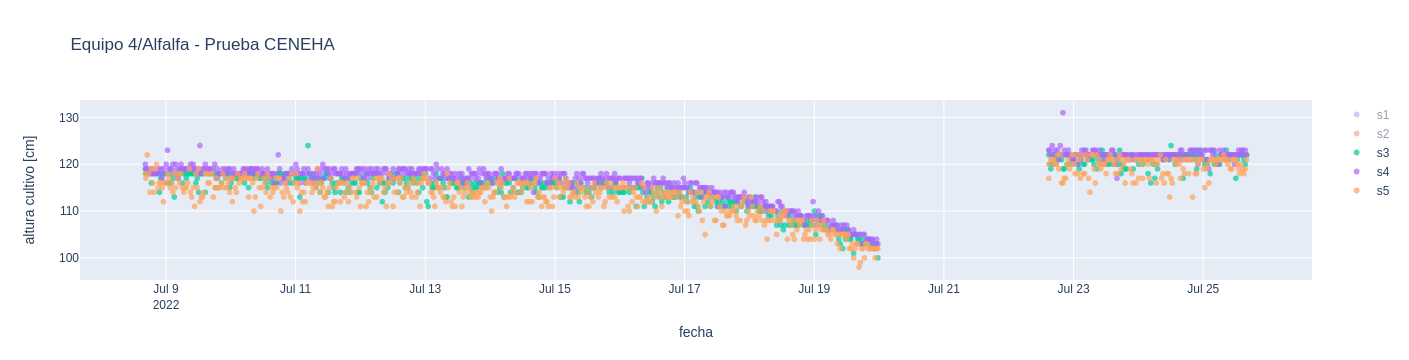

In [7]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=s1.datetime, y=s1.d10, mode='markers', name="s1", opacity=0.7))
fig.add_trace(go.Scattergl(x=s2.datetime, y=s2.d10, mode='markers', name="s2", opacity=0.7))
fig.add_trace(go.Scattergl(x=s3.datetime, y=s3.d10, mode='markers', name="s3", opacity=0.7))
fig.add_trace(go.Scattergl(x=s4.datetime, y=s4.d10, mode='markers', name="s4", opacity=0.7))
fig.add_trace(go.Scattergl(x=s4.datetime, y=s5.d10, mode='markers', name="s5", opacity=0.7))

fig.update_layout(
    title="Equipo 4/Alfalfa - Prueba CENEHA",
    xaxis_title="fecha", yaxis_title="altura cultivo [cm]", 
)
fig.show()

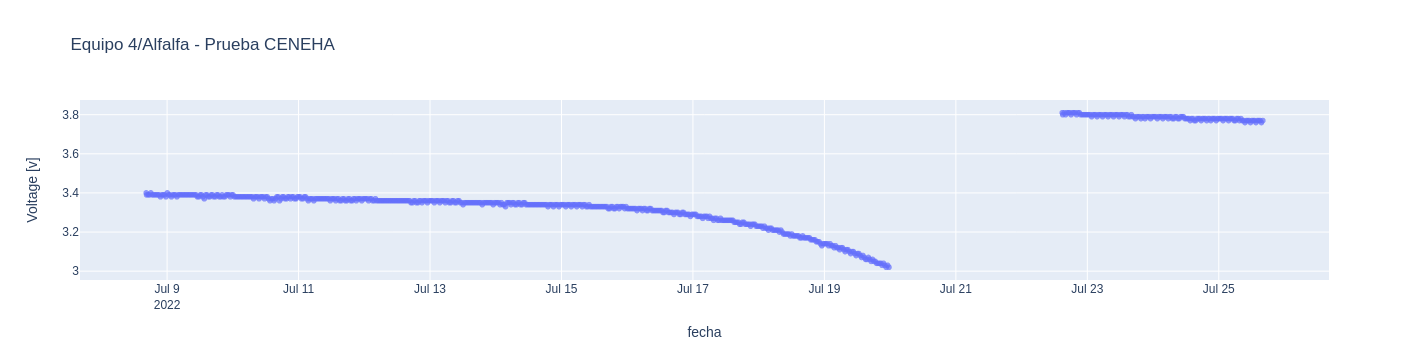

In [9]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=v.datetime, y=v.d1, mode='markers', name="voltage", opacity=0.7))

fig.update_layout(
    title="Equipo 4/Alfalfa - Prueba CENEHA",
    xaxis_title="fecha", yaxis_title="Voltage [v]", 
)
fig.show()

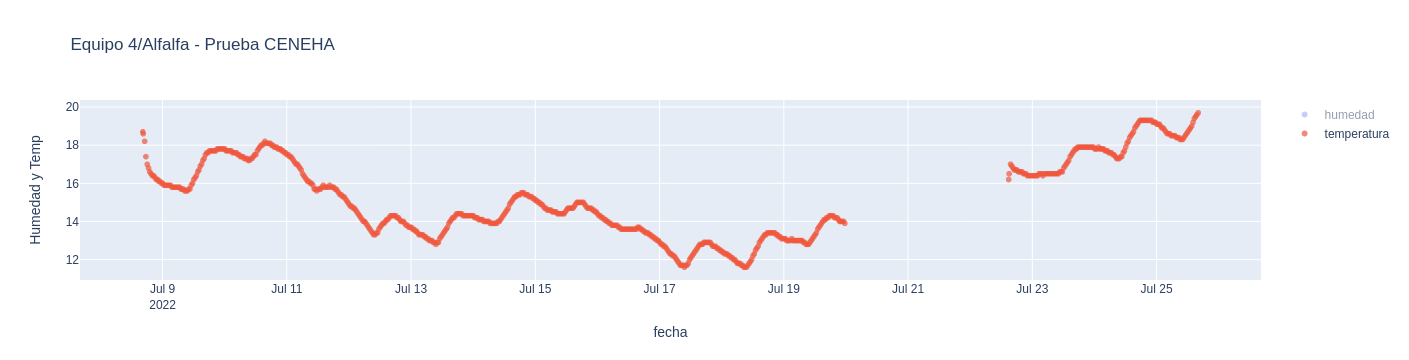

In [12]:
fig = go.Figure()
fig.add_trace(go.Scattergl(x=ht.datetime, y=ht.d1, mode='markers', name="humedad", opacity=0.7))
fig.add_trace(go.Scattergl(x=ht.datetime, y=ht.d2, mode='markers', name="temperatura", opacity=0.7))

fig.update_layout(
    title="Equipo 4/Alfalfa - Prueba CENEHA",
    xaxis_title="fecha", yaxis_title="Humedad y Temp", 
)
fig.show()